In [ ]:
import sqlite3

conn = sqlite3.connect("database.db")
cursor = conn.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('models',),
 ('sqlite_sequence',),
 ('quantizations',),
 ('sd_setups',),
 ('accuracy',),
 ('ld_performances',),
 ('sd_performances',)]

In [23]:
cursor.execute("SELECT * FROM accuracy;")
cursor.fetchall()

[('2025-04-28 13:08:08', 0.44351781652767247, 1, 1),
 ('2025-04-28 13:10:08', 0.34040940106141016, 1, 2),
 ('2025-04-28 13:18:28', 0.7149355572403336, 2, 2),
 ('2025-04-28 13:15:08', 0.7361637604245641, 2, 1),
 ('2025-04-28 13:11:08', 0.6868840030326004, 3, 1),
 ('2025-04-28 13:09:08', 0.43442001516300227, 1, 3),
 ('2025-04-28 13:13:48', 0.6527672479150872, 3, 2),
 ('2025-04-28 13:16:48', 0.7391963608794542, 2, 3),
 ('2025-04-28 13:12:28', 0.6868840030326004, 3, 3)]

In [24]:
cursor.execute("SELECT * FROM models;")
cursor.fetchall()

[(1, 'Llama-3.2-1B-Instruct'),
 (2, 'Llama-3.1-8B-Instruct'),
 (3, 'Llama-3.2-3B-Instruct')]

In [25]:
cursor.execute("SELECT * FROM quantizations;")
cursor.fetchall()

[(1, 'FP16'), (2, 'W4A16'), (3, 'W8A16')]

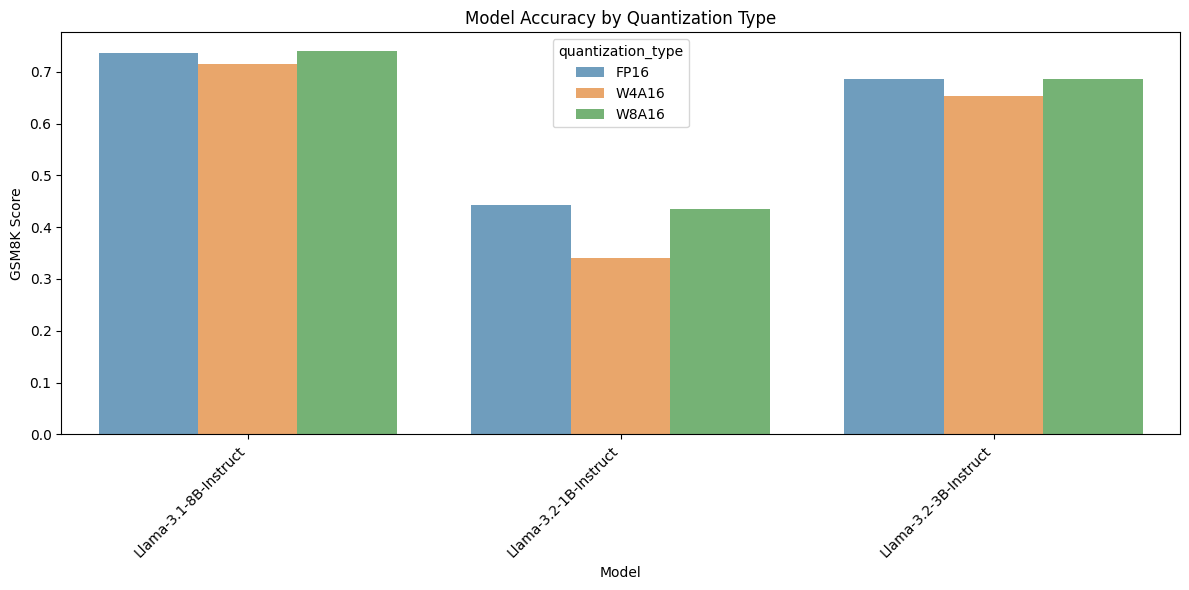

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT 
    m.model_name,
    q.quantization_type,
    a.gsm8k_score,
    a.date
FROM accuracy a
JOIN models m ON a.model_id = m.model_id
JOIN quantizations q ON a.quantization_id = q.quantization_id
ORDER BY m.model_name, q.quantization_type
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="model_name",
    y="gsm8k_score",
    hue="quantization_type",
    alpha=0.7,
)

plt.title("Model Accuracy by Quantization Type")
plt.xlabel("Model")
plt.ylabel("GSM8K Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [35]:
df.style.format({"gsm8k_score": "{:.3f}"})

,model_name,quantization_type,gsm8k_score,date
0,Llama-3.1-8B-Instruct,FP16,0.736,2025-04-28 13:15:08
1,Llama-3.1-8B-Instruct,W4A16,0.715,2025-04-28 13:18:28
2,Llama-3.1-8B-Instruct,W8A16,0.739,2025-04-28 13:16:48
3,Llama-3.2-1B-Instruct,FP16,0.444,2025-04-28 13:08:08
4,Llama-3.2-1B-Instruct,W4A16,0.340,2025-04-28 13:10:08
5,Llama-3.2-1B-Instruct,W8A16,0.434,2025-04-28 13:09:08
6,Llama-3.2-3B-Instruct,FP16,0.687,2025-04-28 13:11:08
7,Llama-3.2-3B-Instruct,W4A16,0.653,2025-04-28 13:13:48
8,Llama-3.2-3B-Instruct,W8A16,0.687,2025-04-28 13:12:28
